# Importing Libraries

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

## Exploring Training Data

In [179]:
data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [180]:
numeric_data=data.select_dtypes(exclude=['object'])
objective_data=data.select_dtypes(include=['object'])

In [181]:
numeric_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [182]:
objective_data.describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [183]:
del data['Cabin']
del data['Ticket']

### Seprating Title from Names and creating Family column

In [184]:
data['Title']=data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
data['Family']=data['SibSp']+data['Parch']+1
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,1


### Filling missing data in Age and Embarked

In [185]:
data['Age'] = data['Age'].interpolate()
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [186]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,1


In [187]:
del data['PassengerId']
del data['Name']
del data['SibSp']
del data['Parch']
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,0,3,male,22.0,7.2500,S,Mr,2
1,1,1,female,38.0,71.2833,C,Mrs,2
2,1,3,female,26.0,7.9250,S,Miss,1
3,1,1,female,35.0,53.1000,S,Mrs,2
4,0,3,male,35.0,8.0500,S,Mr,1


# Analysis of Data

In [188]:
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [189]:
# Changing Other Values to Mics
l=['Mr','Miss','Mrs','Master']
for i in range(len(data)):
    if data["Title"][i] not in l:
        data['Title'][i]="Mics"

C:\Users\Himanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [190]:
survival=data[['Embarked','Sex','Survived']].groupby((['Embarked','Sex']),as_index=False).mean()
survival

,Embarked,Sex,Survived
0,C,female,0.876712
1,C,male,0.305263
2,Q,female,0.750000
3,Q,male,0.073171
4,S,female,0.692683
5,S,male,0.174603


In [191]:
# creating bins for age 
interval = (0, 5, 12, 18, 25, 35, 60, 120)
agebin = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']
data["Agebin"] = pd.cut(data.Age, interval, labels=agebin)

# creating bins for Fare
farebin = (0, 8, 15, 31, 600)
data["farebin"] = pd.cut(data.Fare,farebin)

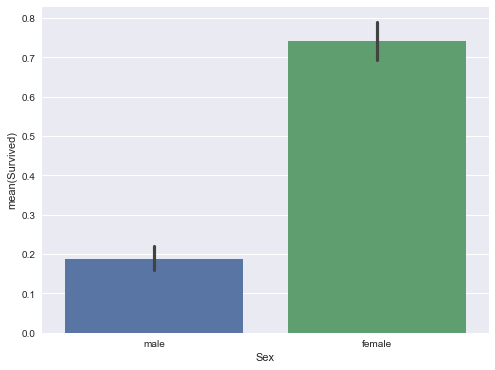

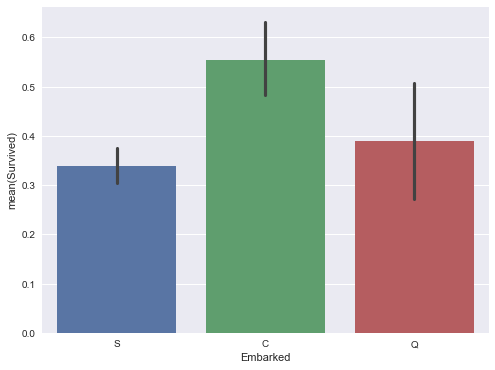

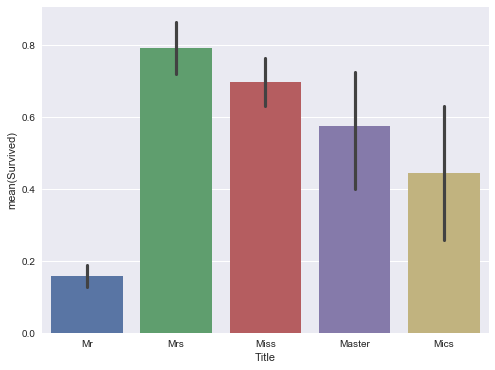

In [192]:
objective_data=data.select_dtypes(include=['object']).columns
for i in objective_data:
    comb=pd.concat([data['Survived'], data[i]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.barplot(x=i, y="Survived", data=comb)
    fig.plot()

[]

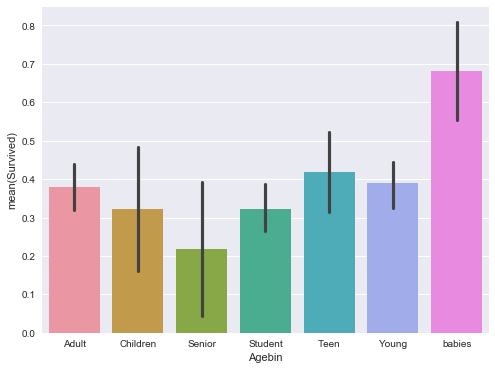

In [193]:
comb=pd.concat([data['Survived'], data['Agebin']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x='Agebin', y="Survived", data=comb)
fig.plot()

[]

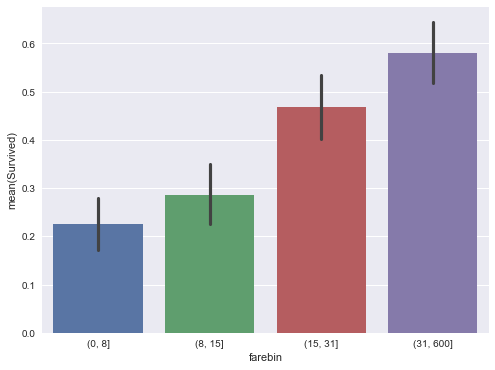

In [194]:
comb=pd.concat([data['Survived'], data['farebin']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x='farebin', y="Survived", data=comb)
fig.plot()

[]

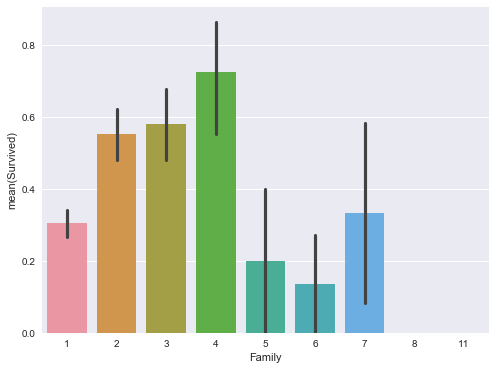

In [195]:
comb=pd.concat([data['Survived'], data['Family']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x='Family', y="Survived", data=comb)
fig.plot()

In [196]:
del data['Age']
del data['Fare']
data.head()

,Survived,Pclass,Sex,Embarked,Title,Family,Agebin,farebin
0,0,3,male,S,Mr,2,Student,"(0, 8]"
1,1,1,female,C,Mrs,2,Adult,"(31, 600]"
2,1,3,female,S,Miss,1,Young,"(0, 8]"
3,1,1,female,S,Mrs,2,Young,"(31, 600]"
4,0,3,male,S,Mr,1,Young,"(8, 15]"


## preparing For Model

In [197]:
data = pd.get_dummies(data, columns=["Sex","Embarked","Agebin","farebin","Title"],prefix=["Sex","Emb","Age","Fare","Prefix"], drop_first=True)

In [198]:
data.head()

,Survived,Pclass,Family,Sex_male,Emb_Q,Emb_S,Age_Children,Age_Senior,Age_Student,Age_Teen,Age_Young,Age_babies,"Fare_(8, 15]","Fare_(15, 31]","Fare_(31, 600]",Prefix_Mics,Prefix_Miss,Prefix_Mr,Prefix_Mrs
0,0,3,2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,3,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,1,2,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
4,0,3,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0


In [199]:
X=data.iloc[:,1:].values
y=data.iloc[:,0].values

In [200]:
X.shape

(891, 18)

# ML Models


## 1. Decision Tree Classification

In [201]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier1.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [202]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier1, X = X, y = y, cv = 10)
print(accuracies.mean())
print(accuracies.std())

0.810345023266
0.0401886432516


## 2. RandomForestClassification

In [203]:
from sklearn.ensemble import RandomForestClassifier
classifier2=rf = RandomForestClassifier(random_state=77,n_estimators=120, min_samples_leaf=7, min_samples_split=50,max_depth=5)
classifier2.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=7,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            n_estimators=120, n_jobs=1, oob_score=False, random_state=77,
            verbose=0, warm_start=False)

In [204]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier2, X = X, y = y, cv = 10)
print(accuracies.mean())
print(accuracies.std())

0.817036658722
0.0271836534446


# SVM classification

In [205]:
from sklearn.svm import SVC
classifier3=SVC(C=2,kernel='rbf')
classifier3.fit(X,y)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [206]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier3, X = X, y = y, cv = 10)
print(accuracies.mean())
print(accuracies.std())

0.833891726251
0.0347367026666


In [207]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[ 0.15678299  0.14251871  0.14280722  0.01407236  0.03894459  0.01566373
  0.01180107  0.01917726  0.01723985  0.02459491  0.03070232  0.02101146
  0.02659775  0.02463344  0.00601805  0.0984169   0.14468943  0.06432796]


## =============================================================

#                                              Test Data

## =============================================================

In [215]:
testdata=pd.read_csv('test.csv')
PassengerId =np.array(testdata["PassengerId"]).astype(int)

In [216]:
testdata['Title']=testdata['Name'].str.extract('([A-Za-z]+)\.', expand=False)
testdata['Family']=testdata['SibSp']+testdata['Parch']+1

In [217]:
del testdata['Name']
del testdata['Cabin']
del testdata['Ticket']
del testdata['SibSp']
del testdata['Parch']
del testdata['PassengerId']

In [218]:
testdata["Age"]=testdata["Age"].interpolate()
testdata.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,3,male,34.5,7.8292,Q,Mr,1
1,3,female,47.0,7.0000,S,Mrs,2
2,2,male,62.0,9.6875,Q,Mr,1
3,3,male,27.0,8.6625,S,Mr,1
4,3,female,22.0,12.2875,S,Mrs,3


In [219]:
# creating bins for age 
interval = (0, 5, 12, 18, 25, 35, 60, 120)
agebin = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']
testdata["Agebin"] = pd.cut(testdata.Age, interval, labels=agebin)

# creating bins for Fare
farebin = (0, 8, 15, 31, 600)
testdata["farebin"] = pd.cut(testdata.Fare,farebin)

In [220]:
l=['Mr','Miss','Mrs','Master']
for i in range(len(testdata)):
    if testdata["Title"][i] not in l:
        testdata['Title'][i]="Mics"

C:\Users\Himanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [221]:
del testdata['Age']
del testdata['Fare']

In [222]:
testdata.head()

,Pclass,Sex,Embarked,Title,Family,Agebin,farebin
0,3,male,Q,Mr,1,Young,"(0, 8]"
1,3,female,S,Mrs,2,Adult,"(0, 8]"
2,2,male,Q,Mr,1,Senior,"(8, 15]"
3,3,male,S,Mr,1,Young,"(8, 15]"
4,3,female,S,Mrs,3,Student,"(8, 15]"


In [223]:
testdata = pd.get_dummies(testdata, columns=["Sex","Embarked","Agebin","farebin","Title"],prefix=["Sex","Emb","Age","Fare","Prefix"], drop_first=True)

In [224]:
Xtest=testdata.values

# Final Result

In [226]:
yresult=classifier3.predict(Xtest)
yresult

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [227]:
my_solution = pd.DataFrame(yresult, PassengerId, columns = ["Survived"])
my_solution.to_csv("newsolution4.csv", index_label = ["PassengerId"])